In [ ]:
config_path = 'config.yaml'

# packages

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yaml
from IPython.display import HTML
import matplotlib.pyplot as plt
from ipywidgets import Combobox, HBox, Checkbox, interactive_output
import pdb

# loading the config

In [ ]:
config = yaml.safe_load(open(config_path, 'rb'))

In [ ]:
fit_intercept = config['fit_intercept']
alpha = config['chart_alpha']

# preparing column names

In [ ]:
lines = open('data/spambase.names').readlines()[33:]
colnames = [x.split(':')[0] for x in lines]
colnames.append('spam_class')

In [ ]:
colnames

# dataset analysis

## reading the dataset

In [ ]:
df = pd.read_csv('data/spambase.data', header = None)
df.columns = colnames

In [ ]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
df.shape

(4601, 58)

## correlation matrix

In [ ]:
df_corr = df.corr()
df_corr

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


## correlation matrix heatmap

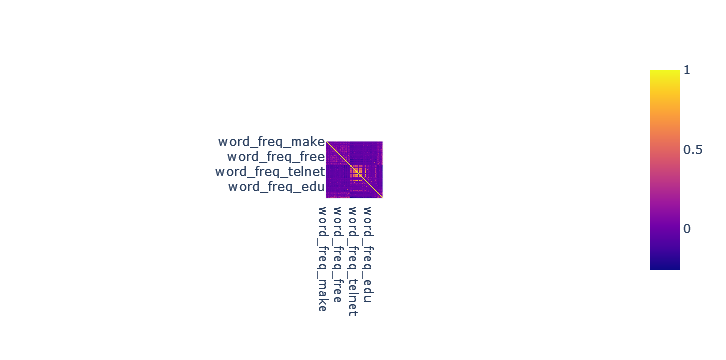

In [ ]:
fig = px.imshow(df_corr)
fig.show()

# other markdown examples

this text is **bold**  
this text is *italic*  
example of **ordered list**
1. item 1
2. item 2
3. item 3

example of **unordered list**
- item 1
- item 2
- item 3

this is the way to write R**code**  
`import pandas as pd`
or **block of code**  

```python
import pandas as pd
df = pd.read_csv('data/spambase.data', header = None)
```  
we can create a **table** as well:  

| Measure | Value |
| ----------- | ----------- |
| $MSE$ | 0.5 |
| $R^2$ | 0.33 |  

this is a link to [codered learning platform](https://codered.eccouncil.org/)  
and lastly, lets show a **picture**   
![picture](newplot.png)

# linear regression

Given a dataset of variables $(X_i, Y_i)$ where $X_i$ is the explanatory variable and $Y_i$ is the dependent variable that varies as $X_i$ does, the simplest model that could be applied for the relation between two of them is a linear one. Simple linear regression model is as follows:

$$ Y_i = \beta_0 + \beta_1 X_i + \epsilon_i $$

$\epsilon_i$ -  is the random component of the regression handling the residue, i.e. the lag between the estimation and actual value of the dependent parameter.  
$\beta_0$ - constant term or the intercept  
$\beta_1$ - coefficient term or slope of the intercept line

**Loss function**  
Mean squared error

$$MSE=\frac{1}{n}\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2$$  
$n$ - number of observations  
$\hat{Y_i}$ - predicted value  

$Y_i$ - observed value

## chart

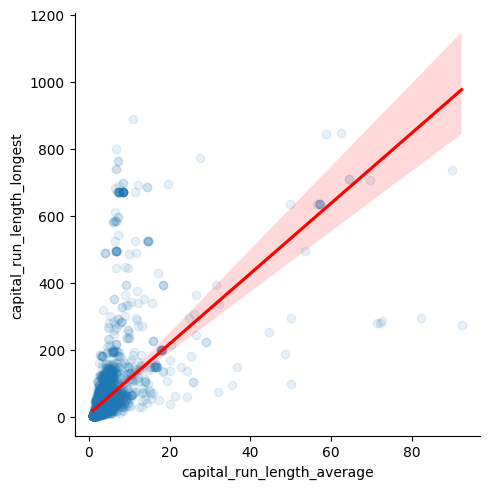

In [ ]:
condition = (df['capital_run_length_average'] < 100) & (df['capital_run_length_longest'] < 1000)
sns.lmplot(x='capital_run_length_average',y='capital_run_length_longest',
           data=df[condition],
           fit_reg=True, 
          scatter_kws={'alpha':alpha}, 
           line_kws={'color': 'red'}) 

In [ ]:
df_corr['capital_run_length_average']['capital_run_length_longest']

## fitting sklearn model

In [ ]:
#pdb.set_trace()
x = df['capital_run_length_average'].to_frame()
y = df['capital_run_length_longest']
model = LinearRegression(fit_intercept = fit_intercept) 
model.fit(x, y)
y_pred = model.predict(x)

## model evaluation

Coefficient of determination $R^{2}$

In [ ]:
model.score(x,y)

Mean squared error $MSE$

In [ ]:
mean_squared_error(x,y)

## model intercept and coefficient

Coefficient $\beta_1$

In [ ]:
model.coef_

Intercept $\beta_0$

In [ ]:
model.intercept_

In [ ]:
import time
time.sleep(5)

In [ ]:
import sys
print(sys.executable)

In [ ]:
%reload_ext rpy2.ipython

## chart in R

In [ ]:
%%R -i df -w 15 -h 10 --units cm 

if (!require('ggplot2')) install.packages('ggplot2',repos='https://cloud.r-project.org/');
library('ggplot2')

ggplot(df, 
       aes(x = capital_run_length_average, y = capital_run_length_longest)) + 
geom_point()

## model in R

In [ ]:
%%R -i df -o intercept_r -o coef_r -o y_pred_r

model <- lm(capital_run_length_longest ~ capital_run_length_average, data = df)
print(model)

intercept_r <- coef(model)['(Intercept)']
coef_r <- coef(model)['capital_run_length_average']
y_pred_r <- predict(model)

In [ ]:
intercept_r, coef_r, type(intercept_r)

In [ ]:
y_pred_r, type(y_pred_r)

# embedding HTML

In [ ]:
HTML('<h1>It seems embedding HTML works!!!</h1>')

# ipywidgets

In [ ]:
#%debug
v1 = Combobox(
    value = 'word_freq_make',
    placeholder='Choose variable 1',
    options=colnames,
    description='X variable',
    ensure_option=True)
v2 = Combobox(
    value = 'word_freq_all',
    placeholder='Choose variable 2',
    options=colnames,
    description='Y variable',
    ensure_option=True,
)
reg = Checkbox(
    value=False,
    description='Fit regresson',
    indent=False
)

def plot_reg(x_var, y_var, reg):
    sns.lmplot(x=x_var,
               y=y_var,
               data=df,
               fit_reg=reg, 
               scatter_kws={'alpha':alpha}, 
               line_kws={'color': 'red'}) 
    plt.show()
    if reg:
        x = df[x_var].to_frame()
        y = df[y_var]
        model = LinearRegression(fit_intercept = fit_intercept)
        model.fit(x, y)
        y_pred = model.predict(x)
        r2 = model.score(x,y)
        print(f'Coeficient of deternination R^2 = {r2}')
        
# An HBox lays out its children horizontally
ui = HBox([v1, v2, reg])

# we link the plotting function, its params to our widgets
out = interactive_output(plot_reg, {'x_var': v1, 'y_var': v2, 'reg':reg})

display(out, ui)

# debugging

In [ ]:
def fit_predict_regression(df, var_explanatory, var_dependent, fit_intercept):
    #pdb.set_trace()
    x = df[var_explanatory].to_frame()
    y = df[var_dependent]
    model = LinearRegression(fit_intercept = fit_intercept)
    model.fit(x, y)
    y_pred = model.predict(y)
    return model, y_pred

In [ ]:
model, y_pred = fit_predict_regression(df, 'capital_run_length_average', 'capital_run_length_longest', fit_intercept)

!!! In case you encounter latex error when converting this file to PDF via Latex, clear above cells output (the output of debugger) !!!

# exercises

1. write latex equation for mean absolute error
2. create a table with Markdown with evaluation metrics of our regression model and their values
3. select 2 variables from our dataset you think might correlate and plot their scatterplot with seaborn
4. create a simple regression model of these variables and evaluate it with $R^{2}$ and $MSE$
5. parameterize variables used in regression model: add target_variable and input_variable to config file and adapt accordingly the notebook

# references

1. [Markdown cheatsheet](https://www.markdownguide.org/cheat-sheet/)
2. [Latex](https://en.wikibooks.org/wiki/LaTeX/Mathematics)
3. [Latex machine learning equations](https://blmoistawinde.github.io/ml_equations_latex)
4. [Simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression)
5. [rpy2 package](https://rpy2.github.io/doc/v3.5.x/html/introduction.html#)
6. [R magic](https://ipython.org/ipython-doc/2/config/extensions/rmagic.html)
7. [IPython magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
8. [Nbparametrise](https://github.com/takluyver/nbparameterise)
9. [Ipywidgets](https://ipywidgets.readthedocs.io/en/stable/)
10. [Custom jupyter widgets](https://github.com/jupyter/jupyter/wiki/Jupyter-Widgets)
11. [Voila](https://voila.readthedocs.io/en/stable/index.html)
12. [Python debugger](https://docs.python.org/3/library/pdb.html)
13. [Nbviewer](https://nbviewer.org/)
14. [Binder](https://mybinder.org/)